 Data Collection & Image Processing


Collecting images of different food items organized into subdirectories based on their respective names

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [ ]:
pwd

'/content/drive/MyDrive/dataset'

In [ ]:
!unzip TRAIN_SET.zip

Archive:  TRAIN_SET.zip
replace TRAIN_SET/APPLES/0_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: TRAIN_SET/APPLES/0_100.jpg  
  inflating: TRAIN_SET/APPLES/1_100.jpg  
  inflating: TRAIN_SET/APPLES/10_100.jpg  
  inflating: TRAIN_SET/APPLES/100_100.jpg  
  inflating: TRAIN_SET/APPLES/101_100.jpg  
  inflating: TRAIN_SET/APPLES/102_100.jpg  
  inflating: TRAIN_SET/APPLES/103_100.jpg  
  inflating: TRAIN_SET/APPLES/104_100.jpg  
  inflating: TRAIN_SET/APPLES/105_100.jpg  
  inflating: TRAIN_SET/APPLES/106_100.jpg  
  inflating: TRAIN_SET/APPLES/107_100.jpg  
  inflating: TRAIN_SET/APPLES/108_100.jpg  
  inflating: TRAIN_SET/APPLES/109_100.jpg  
  inflating: TRAIN_SET/APPLES/11_100.jpg  
  inflating: TRAIN_SET/APPLES/110_100.jpg  
  inflating: TRAIN_SET/APPLES/111_100.jpg  
  inflating: TRAIN_SET/APPLES/112_100.jpg  
  inflating: TRAIN_SET/APPLES/113_100.jpg  
  inflating: TRAIN_SET/APPLES/114_100.jpg  
  inflating: TRAIN_SET/APPLES/115_100.jpg  
  inflating: TRAIN_SET/APP

In [ ]:
!unzip TEST_SET-20221103T125409Z-001.zip

Archive:  TEST_SET-20221103T125409Z-001.zip
replace TEST_SET/WATERMELON/r_89_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: TEST_SET/WATERMELON/r_89_100.jpg  
  inflating: TEST_SET/WATERMELON/r_98_100.jpg  
  inflating: TEST_SET/WATERMELON/r_90_100.jpg  
  inflating: TEST_SET/WATERMELON/r_95_100.jpg  
  inflating: TEST_SET/WATERMELON/r_92_100.jpg  
  inflating: TEST_SET/WATERMELON/r_74_100.jpg  
  inflating: TEST_SET/WATERMELON/r_71_100.jpg  
  inflating: TEST_SET/WATERMELON/r_82_100.jpg  
  inflating: TEST_SET/WATERMELON/r_70_100.jpg  
  inflating: TEST_SET/WATERMELON/r_94_100.jpg  
  inflating: TEST_SET/WATERMELON/r_86_100.jpg  
  inflating: TEST_SET/WATERMELON/r_66_100.jpg  
  inflating: TEST_SET/WATERMELON/r_72_100.jpg  
  inflating: TEST_SET/WATERMELON/r_91_100.jpg  
  inflating: TEST_SET/WATERMELON/r_75_100.jpg  
  inflating: TEST_SET/WATERMELON/r_93_100.jpg  
  inflating: TEST_SET/WATERMELON/r_79_100.jpg  
  inflating: TEST_SET/WATERMELON/r_68_100.jpg  
  inflatin

Importing and configuring the Image data generator library from Keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator#scaling,zooming

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

Applying Image data generator functionality to training set and testing set

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/TRAIN_SET",target_size=(64,64),color_mode='rgb',class_mode="categorical",batch_size=24)

Found 2626 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/TEST_SET",target_size=(64,64),color_mode='rgb',class_mode="categorical",batch_size=24)

Found 1055 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

 Model Building & Testing


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

Initializing the model

In [ ]:
model=Sequential()

Creating the model

In [ ]:
model.add(Conv2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [ ]:
model.add(Dense(5,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 300)               36902700  
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 36,995,401
Trainable params: 36,995,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))

In [ ]:
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
len(x_train)

110

In [ ]:
model.fit(x_train,epochs=10,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))
  

Saving the Model

In [ ]:
model.save('train.h5')

In [ ]:
model.save('dataset.h5')

In [ ]:
model.save('fruits.h5')

In [ ]:
model.save('nutrition.h5')

Testing the Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('train.h5')

In [ ]:
model=load_model('dataset.h5')

In [ ]:
model=load_model('fruits.h5')

In [ ]:
model=load_model('nutrition.h5')

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/dataset/TEST_SET/APPLES/32_100.jpg")


                   

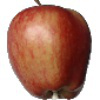

In [ ]:
img


In [ ]:
img=image.load_img(r"/content/drive/MyDrive/dataset/TEST_SET/APPLES/32_100.jpg",target_size=(64,64))

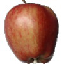

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [ ]:
pred = model.predict
pred

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7fb7d8ec4910>>

In [ ]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=0)

44/44 [==============================] - 6s 127ms/step


In [ ]:
predict_x

array([[0.2414408 , 0.2505612 , 0.2580165 , 0.24998154],
       [0.24153474, 0.2507518 , 0.25773057, 0.24998277],
       [0.2414511 , 0.250628  , 0.25804645, 0.24987444],
       ...,
       [0.24035548, 0.25094715, 0.2576295 , 0.25106782],
       [0.24194266, 0.24975456, 0.25778037, 0.2505225 ],
       [0.24223056, 0.24983889, 0.2579745 , 0.24995604]], dtype=float32)

In [ ]:
classes_x

array([235, 980,  76, 554])

In [ ]:
x_test.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [ ]:
index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']

In [ ]:
index[np.argmax(pred)]

'APPLES'

Build Python Code

In [ ]:
from flask import Flask,render_template,request
# Flask-It is our framework which we are going to use to run/serve our application.
#request-for accessing file which was uploaded by the user on our application.
import os
import numpy as np #used for numerical analysis
from tensorflow.keras.models import load_model#to load our trained model
from tensorflow.keras.preprocessing import image
import requests

Creating our flask application and loading our model by using the load_model method

In [ ]:
app = Flask(__name__,template_folder="templates") # initializing a flask app
# Loading the model
model=load_model('nutrition.h5')
print("Loaded model from disk")


Loaded model from disk


Routing to *Html* page

In [ ]:
@app.route('/')# route to display the home page
def home():
    return render_template('home.html')

In [ ]:
@app.route('/image1',methods=['GET','POST'])# routes to the index html
def image1():
    return render_template("image.html")

In [ ]:
@app.route('/predict',methods=['GET', 'POST'])# route to show the predictions in a web UI
def launch():
    if request.method=='POST':
        f=request.files['file'] #requesting the file
        basepath=os.path.dirname('__file__')#storing the file directory
        filepath=os.path.join(basepath,"uploads",f.filename)#storing the file in uploads folder
        f.save(filepath)#saving the file
        img=image.load_img(filepath,target_size=(64,64)) #load and reshaping the image
        x=image.img_to_array(img)#converting image to an array
        x=np.expand_dims(x,axis=0)#changing the dimensions of the image
        pred=np.argmax(model.predict(x), axis=1)
        print("prediction",pred)#printing the prediction
        index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
        result=str(index[pred[0]])
        x=result
        print(x)
        result=nutrition(result)
        print(result)
        return render_template("0.html",showcase=(result))
        

In [ ]:
x=result
print(x)
result=nutrition(result)
print(result)


PINEAPPLE
{"items": [{"sugar_g": 9.9, "fiber_g": 1.4, "serving_size_g": 100.0, "sodium_mg": 0, "name": "pineapple", "potassium_mg": 8, "fat_saturated_g": 0.0, "fat_total_g": 0.1, "calories": 50.8, "cholesterol_mg": 0, "protein_g": 0.5, "carbohydrates_total_g": 13.0}]}
[{'sugar_g': 9.9, 'fiber_g': 1.4, 'serving_size_g': 100.0, 'sodium_mg': 0, 'name': 'pineapple', 'potassium_mg': 8, 'fat_saturated_g': 0.0, 'fat_total_g': 0.1, 'calories': 50.8, 'cholesterol_mg': 0, 'protein_g': 0.5, 'carbohydrates_total_g': 13.0}]


In [ ]:
def nutrition(index):


    url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"
    
    querystring = {"query":index}
    
    headers = {
        'x-rapidapi-key': "5d797ab107mshe668f26bd044e64p1ffd34jsnf47bfa9a8ee4",
        'x-rapidapi-host': "calorieninjas.p.rapidapi.com"
        }
    response = requests.request("GET", url="https://calorieninjas.p.rapidapi.com/v1/nutrition", headers =
                                {
        'x-rapidapi-key': "5d797ab107mshe668f26bd044e64p1ffd34jsnf47bfa9a8ee4",
        'x-rapidapi-host': "calorieninjas.p.rapidapi.com"
        }, params= {"query":index} )
    print(response.text)     
    return response.json()['items']
    

In [ ]:
if __name__ == "__file__":
   # running the app
    app.run(debug=False)